In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
#Physics parameters
g = 9.81
L=1
#I=(1/12)*m*(L**2)
#b = 0.1    # Gamma/m  Gamma is the viscosity and m the mass 

In [14]:
h = 0.005
#t=np.linspace(0,1+h,50)
t = np.arange(0,1+h,h)
#t

In [15]:
def System(r,t):
    '''
    x,y,vx,vy = r
    
    dxdt = vx
    dydt = vy
    dvxdt = 0. - b*vx
    dvydt = - g - b*vy
    '''
    
    #falling rod
    theta, vtheta=r
    L=1
    
    
    dtheta= vtheta
    ddtheta= ((((2*g)/L) - (vtheta**2)*np.cos(theta))*np.sin(theta))/(1/3 +np.sin(theta)**2)
    
    return [dtheta, ddtheta]

In [16]:
def Integrator2(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    theta = np.zeros_like(t)
    vtheta = np.zeros_like(t)
    
    theta[0] = r0[0]
    vtheta[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([theta[i-1],vtheta[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([theta[i-1]+h*K1[0],vtheta[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1]+h)
        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        vtheta[i] = vtheta[i-1] + 0.5*h*(K1[1]+K2[1])
        
    return theta, vtheta

In [17]:
theta = 10*np.pi/180
vtheta= 0
r0 = [theta, vtheta]

In [18]:
theta, vtheta = Integrator2(System,r0,t)

0.005


In [19]:
r = integrate.odeint(System,r0,t)

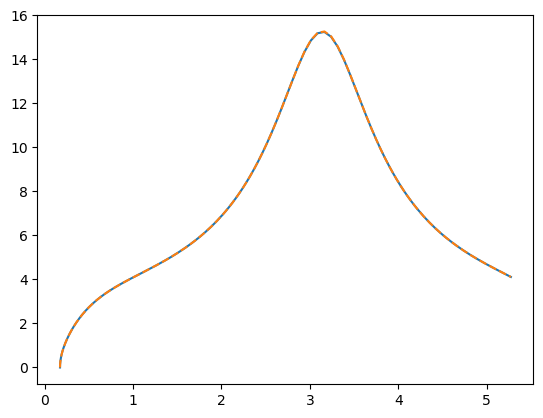

In [20]:
plt.plot(theta,vtheta)
plt.plot(r[:,0],r[:,1], '--')

Text(0, 0.5, 'y (m)')

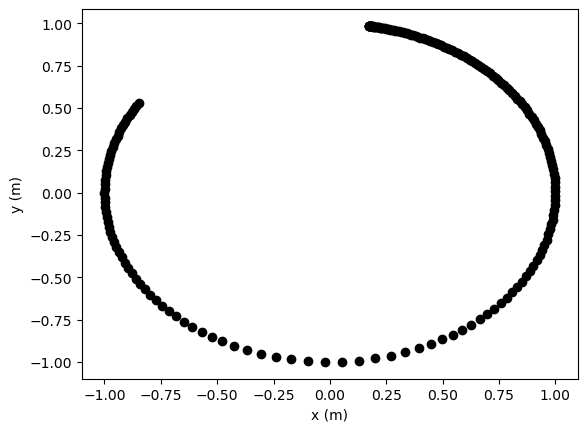

In [21]:
plt.scatter(L*np.sin(theta),L*np.cos(theta), color='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

In [22]:
#estimacion tiempo
for i in range(len(theta)):
    #print(i)
    if np.round(theta[i],2)== np.round(90*np.pi/180,2) or np.round(theta[i],2)== np.round(90*np.pi/180,2)+0.01 or np.round(theta[i],2)== np.round(90*np.pi/180,2)-0.01:
        tf=t[i]
        tf_=i
        
print(tf, np.round(90*np.pi/180,2), np.round(theta[tf_],2))
print('tiempo que alcanza el suelo es:',tf)
      


0.515 1.57 1.56
tiempo que alcanza el suelo es: 0.515


In [23]:
theta, vtheta = Integrator2(System,r0,t)

0.005


[0.17453293 0.17465009 0.17500162 0.17558782 0.17640922 0.17746653
 0.17876069 0.1802928  0.18206419 0.18407634 0.18633094 0.18882983
 0.19157504 0.19456871 0.19781316 0.20131082 0.20506424 0.20907608
 0.21334907 0.21788601 0.22268976 0.22776322 0.23310926 0.23873079
 0.24463066 0.25081166 0.25727653 0.26402788 0.27106821 0.27839987
 0.28602504 0.2939457  0.30216362 0.31068033 0.31949713 0.32861501
 0.33803471 0.34775667 0.35778101 0.36810754 0.37873579 0.38966492
 0.40089383 0.41242108 0.42424497 0.43636347 0.44877434 0.46147504
 0.47446283 0.48773475 0.50128766 0.51511827 0.52922313 0.54359873
 0.55824143 0.57314756 0.58831344 0.60373537 0.61940967 0.63533272
 0.65150097 0.66791098 0.68455938 0.70144298 0.71855872 0.7359037
 0.75347522 0.77127075 0.789288   0.80752487 0.82597951 0.8446503
 0.86353587 0.8826351  0.90194714 0.92147141 0.9412076  0.96115569
 0.98131596 1.00168897 1.02227559 1.04307701 1.06409473 1.08533058
 1.10678673 1.12846571 1.15037038 1.172504   1.1948702  1.217473

Text(0, 0.5, 'y (m)')

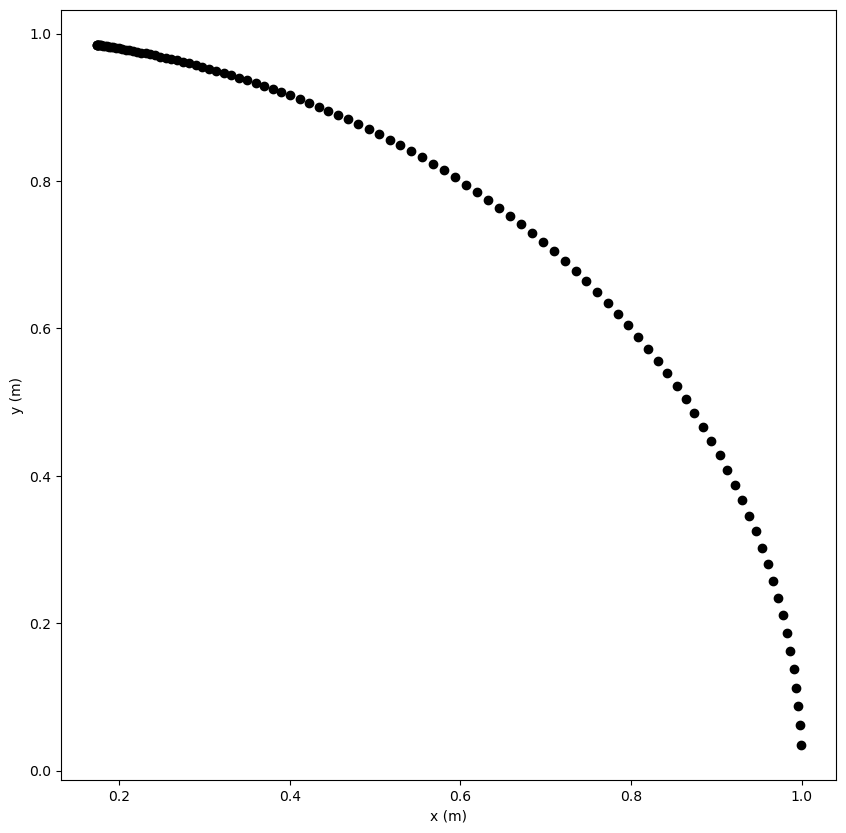

In [26]:
thetatf=theta.copy()
print(thetatf)
thetatf=thetatf[:tf_]

plt.figure(figsize=(10,10))
plt.scatter(L*np.sin(thetatf),L*np.cos(thetatf), color='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')